In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

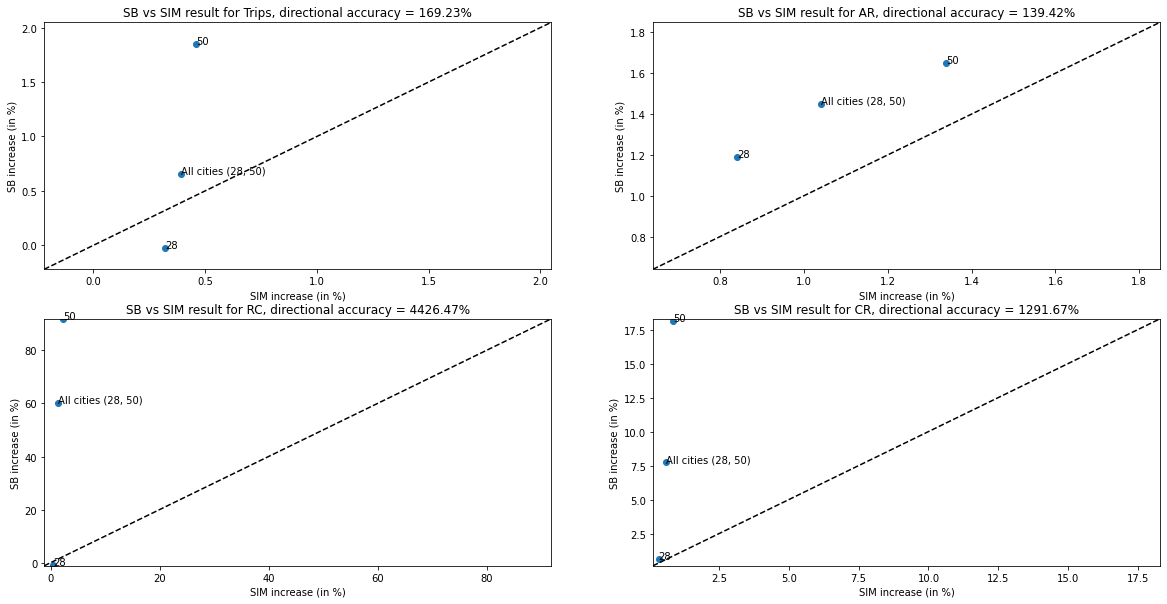

In [2]:
data = pd.read_csv("ettuff_sim_vs_sb.csv") # https://docs.google.com/spreadsheets/d/1vOjXHOhgRmU23D4hAfy8L9X1Tdt4T0O1uiAt9oHlvCw/edit#gid=1271327713


fig, axs = plt.subplots(2, 2, figsize=(20,10))
idx = [0, 0, 1, 1]
idy = [0, 1, 0, 1]
for i, metric in enumerate(['Trips', 'AR', 'RC', 'CR', ]):
    x = data['SIM {}'.format(metric)]*100
    y = data['SB {}'.format(metric)]*100
    acc = y[0]/x[0]*100
    ax = axs[idx[i], idy[i]]
    ax.scatter(x, y)
    ax.set_xlabel("SIM increase (in %)")
    ax.set_ylabel("SB increase (in %)")
    ax.set_title("SB vs SIM result for {}, directional accuracy = {:.2f}%".format(metric, acc))
    a = min(min(x), min(y)) - 0.2
    b = max(max(x), max(y)) + 0.2
    ax.set_xlim(a, b)
    ax.set_ylim(a, b)
    ax.plot([a, b], [a, b], '--k')
    for i, txt in enumerate(data['Population']):
        ax.annotate(txt, (x[i], y[i]))
plt.savefig("sim_gap_analysis_results/full.pdf")